In [211]:
from scipy.io import arff
import pandas as pd
import numpy as np
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [212]:
#part (a)
#I find how to load arff data from chatgpt
#the ChatGPT content is
#how to read arff file
#Using pandas with the scipy package
#The scipy library provides an easy way to read ARFF files if they are in a supported format. 
#Here's an example using pandas:
#from scipy.io import arff
#import pandas as pd

# Read the ARFF file
#data, meta = arff.loadarff('your_file.arff')

# Convert the data to a pandas DataFrame
#df = pd.DataFrame(data)

# View the DataFrame
#print(df.head())
#df['attribute_name'] = df['attribute_name'].str.decode('utf-8')


file_path = 'column_2C_weka.arff'
data, meta = arff.loadarff(file_path)

df = pd.DataFrame(data)
print(df.head())

   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis        class  
0      98.672917                 -0.254400  b'Abnormal'  
1     114.405425                  4.564259  b'Abnormal'  
2     105.985135                 -3.530317  b'Abnormal'  
3     101.868495                 11.211523  b'Abnormal'  
4     108.168725                  7.918501  b'Abnormal'  


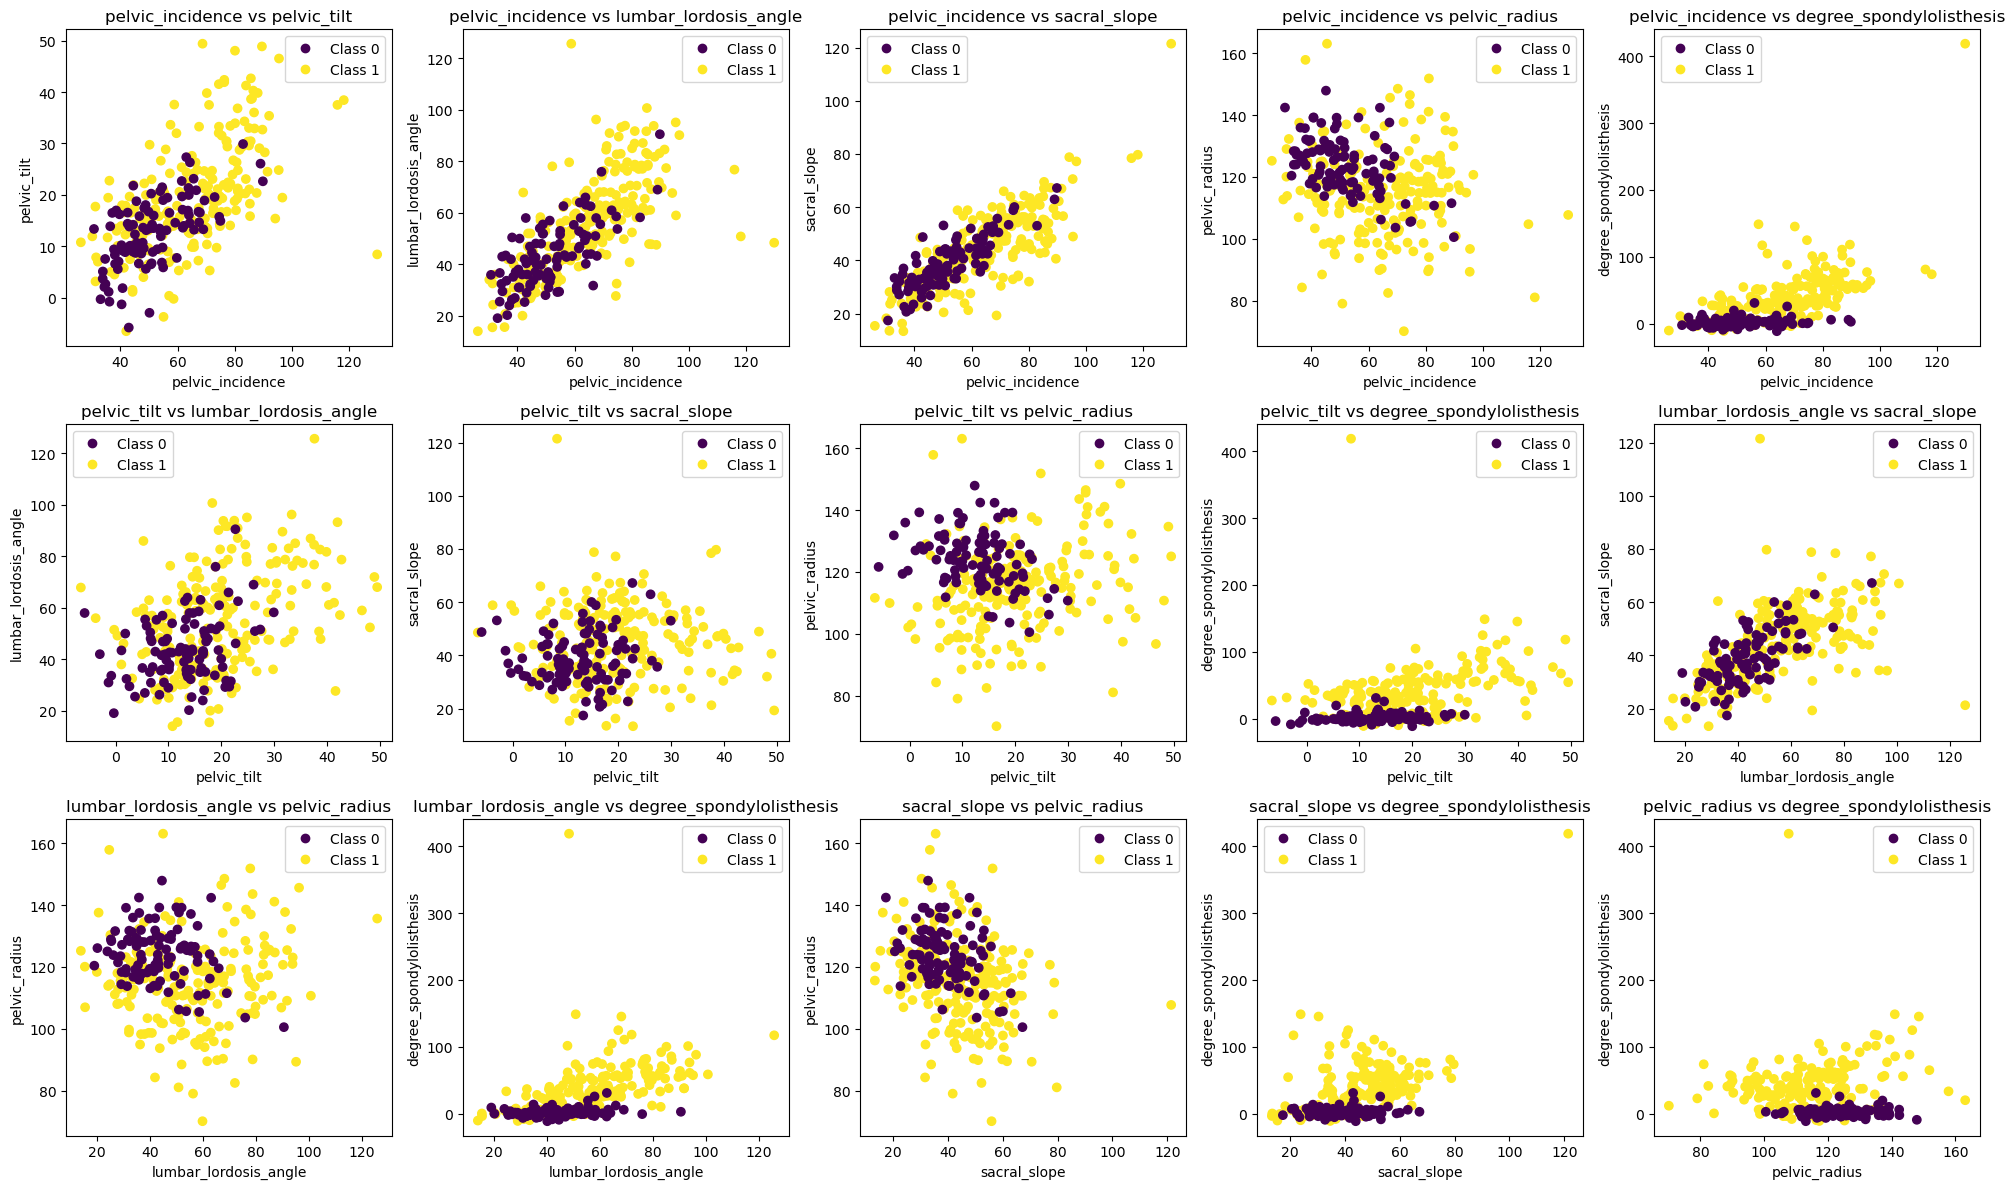

In [213]:
#part (b)
df['class'] = df['class'].str.decode('utf-8')
df['new_class'] = [0 if value == 'Normal' else 1 for value in df['class']]

columns = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 
           'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

fig, ax = plt.subplots(3, 5, figsize=(20, 12))

count = 0 
for i in range(6):
    for j in range(i + 1, 6):
        
        row = count // 5
        col = count % 5
        
        scatter = ax[row, col].scatter(df[columns[i]], df[columns[j]], 
                                         c=df['new_class'])
        
        ax[row, col].set_title(f'{columns[i]} vs {columns[j]}')
        ax[row, col].set_xlabel(columns[i])
        ax[row, col].set_ylabel(columns[j])

        #I used chatgpt to help me with this label part
        #the ChatGPT content is
        #using the scatter.legend_elements() method, you can generate a legend that corresponds to the colors in 
        #the scatter plot. Here’s how to incorporate it into your code while ensuring the legend reflects the 
        #class colors accurately.
        # handles, labels = scatter.legend_elements(prop="colors")
        #ax[row, col].legend(handles, labels, title="Class")
        
        handles, labels = scatter.legend_elements(prop="colors")
        ax[row, col].legend(handles, ['Class 0', 'Class 1'])

        count += 1 

plt.tight_layout()
plt.show()

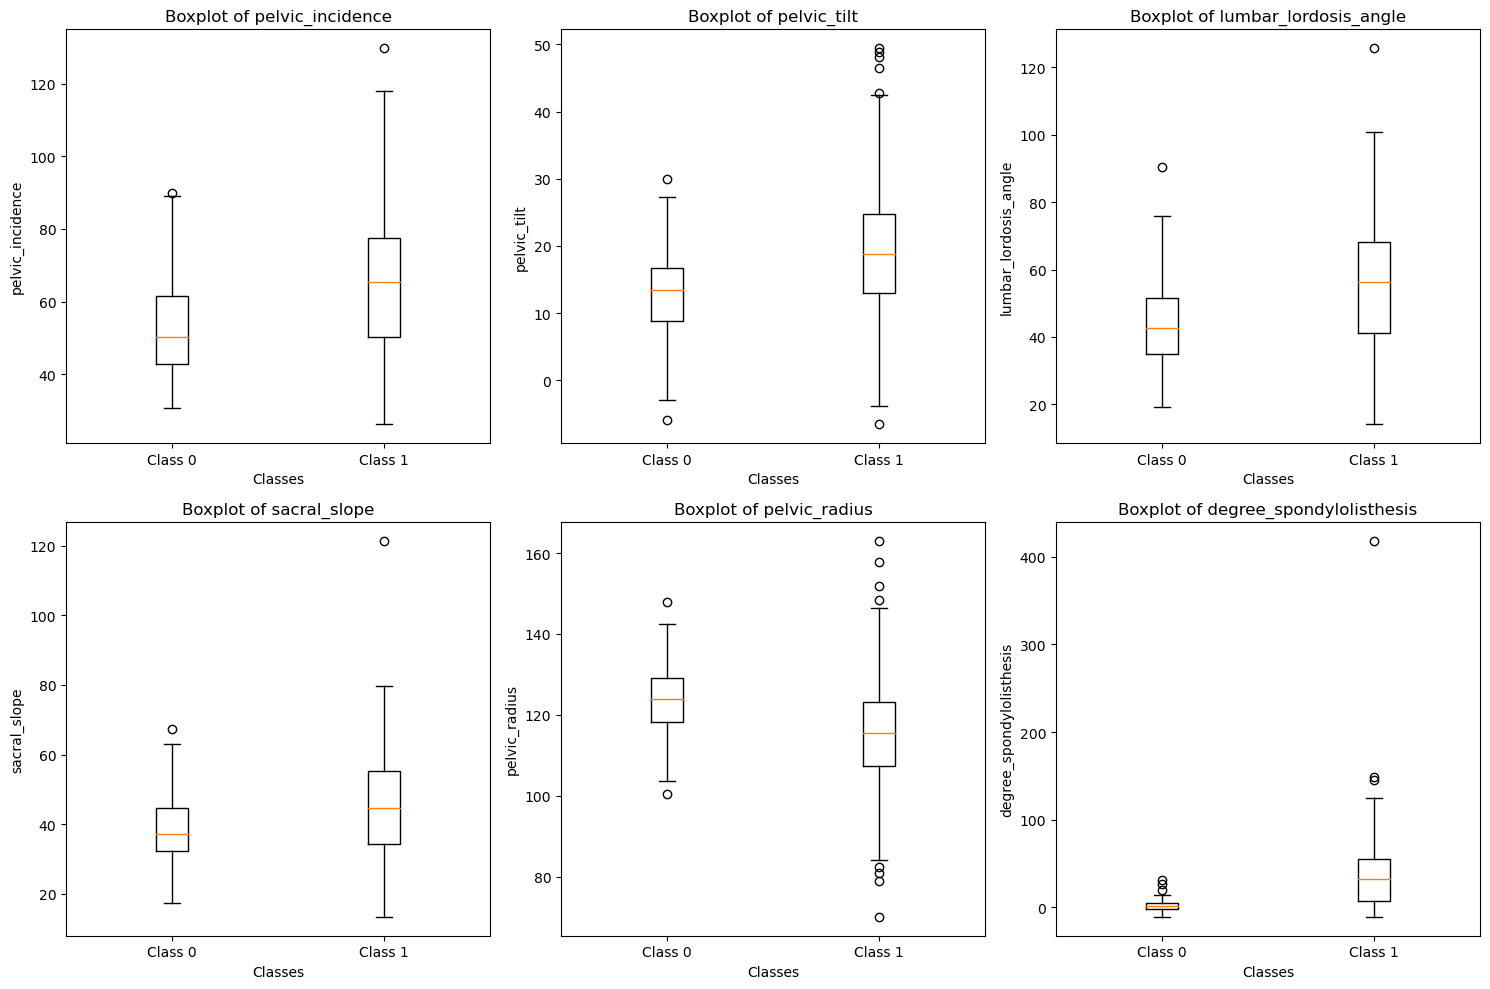

In [184]:
#part (b)ii
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

for i, v in enumerate(columns):
    row = i // 3
    col = i % 3
    
    bplot = ax[row, col].boxplot([df[df['new_class'] == 0][v], 
                                    df[df['new_class'] == 1][v]], 
                                   labels=['Class 0', 'Class 1'])

    ax[row, col].set_title(f'Boxplot of {v}')
    ax[row, col].set_xlabel('Classes')
    ax[row, col].set_ylabel(v)

plt.tight_layout()
plt.show()

In [185]:
#part (b)iii
class_0 = df[df['new_class'] == 0]
class_1 = df[df['new_class'] == 1]

train_class_0 = class_0.head(70)
train_class_1 = class_1.head(140)

test_class_0 = class_0.drop(train_class_0.index)
test_class_1 = class_1.drop(train_class_1.index)

train_set = pd.concat([train_class_0, train_class_1])
test_set = pd.concat([test_class_0, test_class_1])

In [186]:
X_train = train_set.drop(columns=['class', 'new_class'])
y_train = train_set['new_class']

X_test = test_set.drop(columns=['class', 'new_class'])
y_test = test_set['new_class']

In [187]:
print(train_set.head())

     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
210         38.505273    16.964297              35.112814     21.540976   
211         54.920858    18.968430              51.601455     35.952428   
212         44.362490     8.945435              46.902096     35.417055   
213         48.318931    17.452121              48.000000     30.866809   
214         45.701789    10.659859              42.577846     35.041929   

     pelvic_radius  degree_spondylolisthesis   class  new_class  
210     127.632875                  7.986683  Normal          0  
211     125.846646                  2.001642  Normal          0  
212     129.220682                  4.994195  Normal          0  
213     128.980308                 -0.910941  Normal          0  
214     130.178314                 -3.388910  Normal          0  


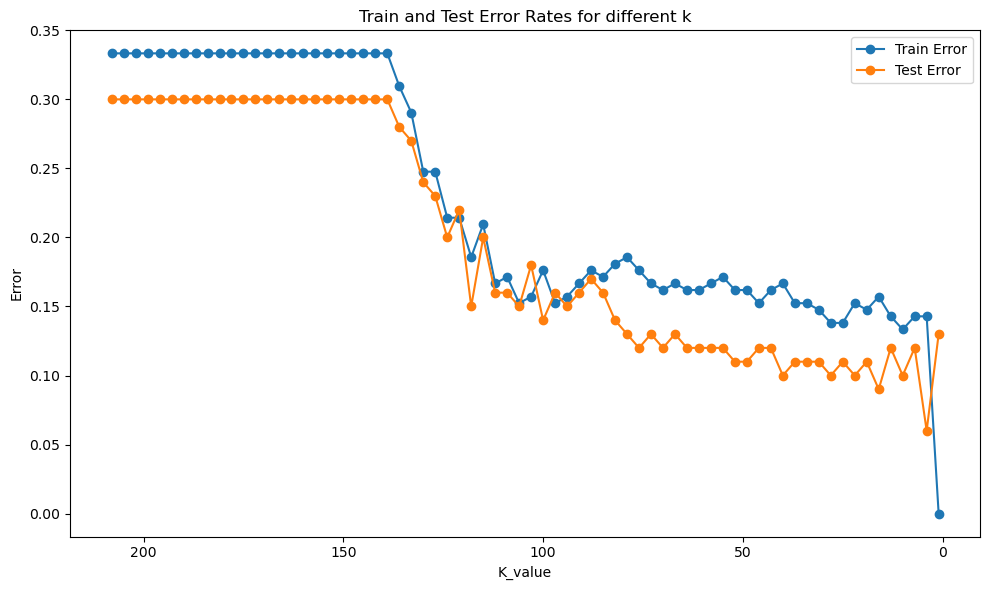

The best k is: 4
The test error is 0.06


In [188]:
#part (c)i and ii
k_values = range(208, 0, -3)
train_error = []
test_error = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    
    y_train_pred = knn.predict(X_train)
    one_train_error = 1 - accuracy_score(y_train, y_train_pred)
    train_error.append(one_train_error)
    
    y_test_pred = knn.predict(X_test)
    one_test_error = 1 - accuracy_score(y_test, y_test_pred)
    test_error.append(one_test_error)

min_eudlidean_test_error = min(test_error)
best_eudlidean_k = k_values[test_error.index(min_eudlidean_test_error)]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(k_values, train_error, 'o-', label="Train Error")
ax.plot(k_values, test_error, 'o-', label="Test Error")
w = ax.invert_xaxis()

ax.set_xlabel("K_value")
ax.set_ylabel("Error")
ax.set_title("Train and Test Error Rates for different k")
ax.legend()

plt.tight_layout()
plt.show()

print(f"The best k is: {best_eudlidean_k}")
print(f"The test error is {min_eudlidean_test_error:.2f}")

In [189]:
#part (c)ii
best_knn = KNeighborsClassifier(n_neighbors=best_eudlidean_k, metric='euclidean')
best_knn.fit(X_train, y_train)
best_y = best_knn.predict(X_test)

print(confusion_matrix(y_test, best_y))
tn, fp, fn, tp = confusion_matrix(y_test, best_y).ravel()

accuracy = accuracy_score(y_test, best_y)
true_positive_rate = tp / (tp + fn) 
true_negative_rate = tn / (tn + fp)  
precision = precision_score(y_test, best_y)
f1 = f1_score(y_test, best_y)

print(f"The accuracy is: {accuracy:.2f}")
print(f"True positive rate is: {true_positive_rate:.2f}")
print(f"True negative rate is: {true_negative_rate:.2f}")
print(f"Precision is: {precision:.2f}")
print(f"F1 score is: {f1:.2f}")

[[25  5]
 [ 1 69]]
The accuracy is: 0.94
True positive rate is: 0.99
True negative rate is: 0.83
Precision is: 0.93
F1 score is: 0.96


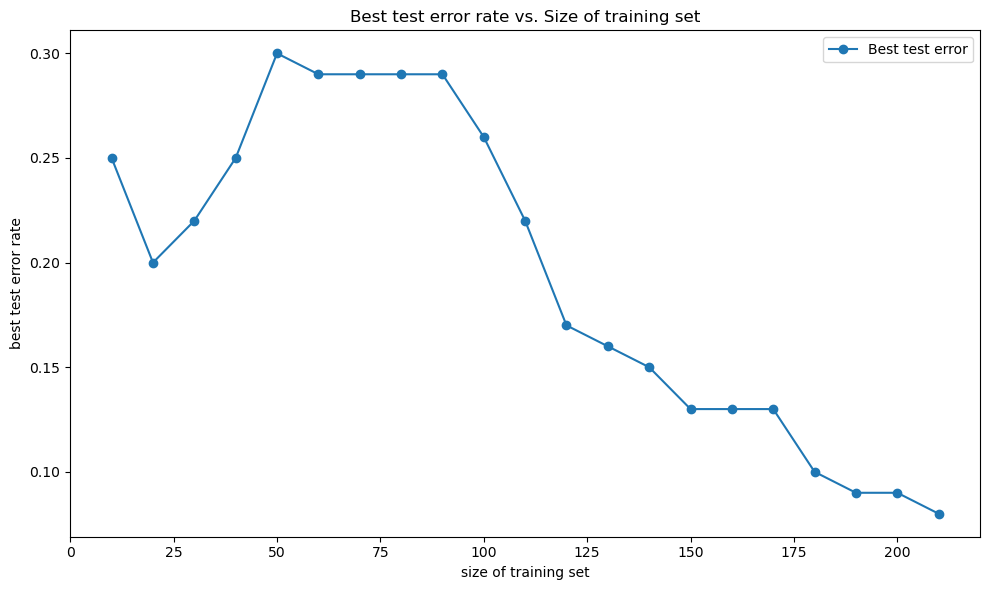

In [190]:
#part (c)iii
N = range(10, 211, 10)
list_test_errors = []

for i in N:
    a1 = i//3
    a2 = i-a1
    
    N_train_class_0 = train_class_0.head(a1)
    N_train_class_1 = train_class_1.head(a2)
    N_train_set = pd.concat([N_train_class_0, N_train_class_1])
    
    N_X_train = N_train_set.drop(columns=['class', 'new_class'])
    N_Y_train = N_train_set['new_class']

    sub_k = range(1, i, 5)
    sub_test_errors = []

    for k in sub_k:
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(N_X_train, N_Y_train)
        
        y_test_pred = knn.predict(X_test)
        N_test_error = 1 - accuracy_score(y_test, y_test_pred)
        
        sub_test_errors.append(N_test_error)

    list_test_errors.append(min(sub_test_errors))

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(N, list_test_errors, 'o-', label="Best test error")

ax.set_xlabel("size of training set")
ax.set_ylabel("best test error rate")
ax.set_title("Best test error rate vs. Size of training set")
ax.legend()

plt.tight_layout()
plt.show()

In [191]:
#part (d)iA
new_k = range(1, 197, 5) 
best_Manhattan_k = None
test_Manhattan_errors = []

for k in new_k:  
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1) 
    knn.fit(X_train, y_train) 
    
    y_test_pred = knn.predict(X_test) 
    Manhattan_error = 1 - accuracy_score(y_test, y_test_pred) 
    test_Manhattan_errors.append(Manhattan_error) 

min_Manhattan_test_error = min(test_Manhattan_errors)
best_Manhattan_k = new_k[test_Manhattan_errors.index(min_Manhattan_test_error)] 

print(f"The best Manhattan k is: {best_Manhattan_k}")
print(f"The Manhattan test error is {min_Manhattan_test_error:.2f}")

The best Manhattan k is: 1
The Manhattan test error is 0.11


In [192]:
#part (d)iB
new_k = range(1, 197, 5)
log_p_values = np.arange(0.1, 1.1, 0.1) 
p_values = [10 ** log_p for log_p in log_p_values]  
best_log_p = None
test_minkowski_errors = []

for p in p_values:
    knn = KNeighborsClassifier(n_neighbors=best_Manhattan_k, metric='minkowski', p=p)
    knn.fit(X_train, y_train)
    
    y_test_pred = knn.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    test_minkowski_errors.append(test_error)

min__log_p_test_error = min(test_minkowski_errors)
best_log_p = log_p_values[test_minkowski_errors.index(min__log_p_test_error)]  

print(f"The best log10(p) is: {best_log_p: .2f}")
print(f"The Minkowski test error is {min__log_p_test_error:.2f}")

The best log10(p) is:  0.70
The Minkowski test error is 0.11


In [193]:
#part (d)iC
new_k = range(1, 197, 5)  
best_Chebyshev_k = None
test_Chebyshev_errors = []

for k in new_k:  
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')  
    knn.fit(X_train, y_train) 
    
    y_test_pred = knn.predict(X_test)  
    test_error = 1 - accuracy_score(y_test, y_test_pred)  
    test_Chebyshev_errors.append(test_error)  


min_Chebyshev_test_error = min(test_Chebyshev_errors)
best_Chebyshev_k = new_k[test_Chebyshev_errors.index(min_Chebyshev_test_error)] 

print(f"The best Chebyshev is: {best_Chebyshev_k}")
print(f"The Chebyshev test error is {min_Chebyshev_test_error:.2f}")

The best Chebyshev is: 16
The Chebyshev test error is 0.08


In [194]:
#part (d)ii
cov_matrix = np.cov(X_train.T)
inv_cov_matrix = inv(cov_matrix)  

new_k = range(1, 197, 5) 
best_mahalanobis_k = None
test_mahalanobis_errors = []

for k in new_k: 
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': inv_cov_matrix})
    knn.fit(X_train, y_train) 
    
    y_test_pred = knn.predict(X_test) 
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    test_mahalanobis_errors.append(test_error) 

min_mahalanobis_test_error = min(test_mahalanobis_errors)
best_mahalanobis_k = new_k[test_mahalanobis_errors.index(min_mahalanobis_test_error)] 

print(f"The best mahalanobis is: {best_mahalanobis_k}")
print(f"The mahalanobis test error is {min_mahalanobis_test_error:.2f}")

The best mahalanobis is: 1
The mahalanobis test error is 0.15


In [195]:
#part (d)
columns = ['Distance Metric', 'Best k', 'Best Test Error']

data = [('Manhattan Distance', best_Manhattan_k, min_Manhattan_test_error),
        ('Minkowski Distance', best_Manhattan_k, min__log_p_test_error),
    ('Chebyshev Distance', best_Chebyshev_k, min_Chebyshev_test_error),
        ('Mahalanobis Distance', best_mahalanobis_k, min_mahalanobis_test_error)]

summary_table = pd.DataFrame(data, columns=columns)
print(summary_table)

best_errors = min(summary_table['Best Test Error'])
best_distance_matrix = summary_table[summary_table["Best Test Error"] == best_errors]["Distance Metric"].values[0]

print(f"\nThe best test error is: {best_errors:.2f}")
print(f"The best distance matrx is: {best_distance_matrix}")

        Distance Metric  Best k  Best Test Error
0    Manhattan Distance       1             0.11
1    Minkowski Distance       1             0.11
2    Chebyshev Distance      16             0.08
3  Mahalanobis Distance       1             0.15

The best test error is: 0.08
The best distance matrx is: Chebyshev Distance


In [196]:
#part (e)
metrics = ['euclidean', 'manhattan', 'chebyshev']
metrics_name = ['weighted_euclidean', 'weighted_manhattan', 'weighted_chebyshev']
index = 0
weighted_errors = []

for metric in metrics:
    best_test_error = []
    best_k = None
    
    for i in new_k:
        
        knn = KNeighborsClassifier(n_neighbors=i, metric=metric, weights='distance')
        knn.fit(X_train, y_train)
        
        y_test_pred = knn.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        best_test_error.append(test_error)
        
        min_test_error = min(best_test_error)
        best_k = new_k[best_test_error.index(min_test_error)]
        
    weighted_errors.append((metrics_name[index], best_k, min_test_error))
    index += 1
    
weighted_summary_table = pd.DataFrame(weighted_errors, columns=columns)
print(weighted_summary_table)

      Distance Metric  Best k  Best Test Error
0  weighted_euclidean       6             0.10
1  weighted_manhattan      26             0.10
2  weighted_chebyshev      16             0.11


In [197]:
eudlidean_metric_row =  pd.DataFrame({'Distance Metric': ['Eudlidean Distance'],  'Best k': [best_eudlidean_k], 'Best Test Error': [min_eudlidean_test_error]})
total_best_error_table = pd.concat([eudlidean_metric_row, summary_table, weighted_summary_table])

print(total_best_error_table)

best_whole_errors = min(total_best_error_table['Best Test Error'])
best_whole_distance_matrix = total_best_error_table[total_best_error_table["Best Test Error"] == best_whole_errors]["Distance Metric"].values[0]

print(f"\nThe best test error is: {best_whole_errors:.2f}")
print(f"The best distance matrx is: {best_whole_distance_matrix}")

        Distance Metric  Best k  Best Test Error
0    Eudlidean Distance       4             0.06
0    Manhattan Distance       1             0.11
1    Minkowski Distance       1             0.11
2    Chebyshev Distance      16             0.08
3  Mahalanobis Distance       1             0.15
0    weighted_euclidean       6             0.10
1    weighted_manhattan      26             0.10
2    weighted_chebyshev      16             0.11

The best test error is: 0.06
The best distance matrx is: Eudlidean Distance


part (f)
I think the lowest training error rate I achieved in this homework is based on part(c)i,I used eudlidean metric to find k from the inverse order k ∈ {208, 205, . . . , 7, 4, 1, }, and my best k value is 4, my best test error is 0.06.
